In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

nx = 81                        #number of spatial grid points
dx = 2 / (nx-1)
nt = 25                       #nt is the number of timesteps we want to calculate
dt = .025                     #dt is the amount of time each timestep covers (delta t)
c = 1                         #assume wavespeed of c = 1
u = np.ones(nx)               #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

Text(0, 0.5, 'u(x,t)')

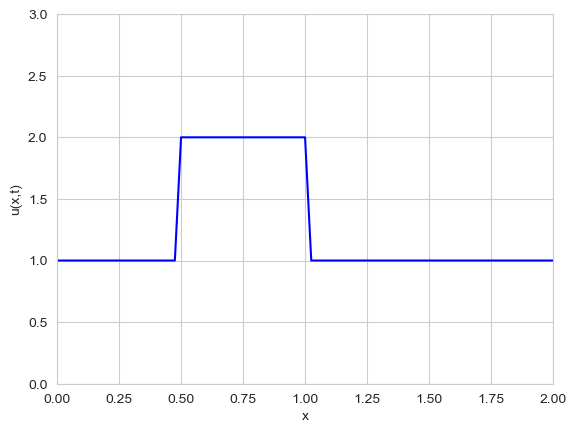

In [3]:
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, 2, nx), u, 'b-')
ax.set_xlim(0, 2)
ax.set_ylim(0, 3)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')

In [4]:
def update(frame):
    global u, un
    # Update the temporary array with the current values of u
    un = u.copy()
    # Compute the new values of u based on the previous values and time step
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
    # Update the plot with the new values of u
    line.set_ydata(u)

ani = FuncAnimation(fig, update, frames=nt, interval=200, blit=False)
ani.save('wave_equation.gif')
print("Animation saved to wave_equation.gif")

MovieWriter ffmpeg unavailable; using Pillow instead.


Animation saved to wave_equation.gif


## Evolution of Wave Equation

![wave_equation](wave_equation.gif)